## Complete Case Analysis


1. It's aslo called list wise deletion of cases and consists of discarding variations with any missing values.
2. It's applied to both the categorical and numerical values.
3. It's applied in the cases where data is missing completely at random and only 5% of the data is missing.
4. Sustain the distribution of the data.
5. It's to be used carefully as it may result in some disadvantages:

        i.  Loss of informative data 
        ii. Bias Model creation 
        iii.Production model wont be able to handle missing data
        

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



In [29]:
data = pd.read_csv('housing.csv')
data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [30]:
data.shape

(1460, 81)

In [33]:

vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [34]:
data[vars_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [42]:
#calculating the precentage of missing data 
data_na = data[vars_with_na].isnull().mean()
data_na = pd.DataFrame(data_na.reset_index())

#Adding columns to the dataframe 
data_na.columns = ['variable', 'na_fraction']

# Order the dataframe according to proportion of na per variable.
data_na.sort_values(by='na_fraction', ascending=False, inplace=True)
data_na

variable  na_fraction
16        PoolQC     0.995205
18   MiscFeature     0.963014
1          Alley     0.937671
17         Fence     0.807534
10   FireplaceQu     0.472603
0    LotFrontage     0.177397
11    GarageType     0.055479
12   GarageYrBlt     0.055479
13  GarageFinish     0.055479
14    GarageQual     0.055479
15    GarageCond     0.055479
6   BsmtExposure     0.026027
8   BsmtFinType2     0.026027
7   BsmtFinType1     0.025342
5       BsmtCond     0.025342
4       BsmtQual     0.025342
3     MasVnrArea     0.005479
2     MasVnrType     0.005479
9     Electrical     0.000685

In [43]:
#Some variables contains more than 5% data so we wont pick them up 
#For CCA we will be picking up only the data with 5% missing value 
vars_cca = [var for var in vars_with_na if data[var].isnull().mean() < 0.05]
vars_cca

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [44]:
#Calculating the total portion of data avaiable 

len(data.dropna(subset=vars_cca)) / len(data)

0.9671232876712329

In [45]:
#removing na_variables with 
data_cca = data.dropna(subset=vars_cca)

data.shape, data_cca.shape

((1460, 81), (1412, 81))

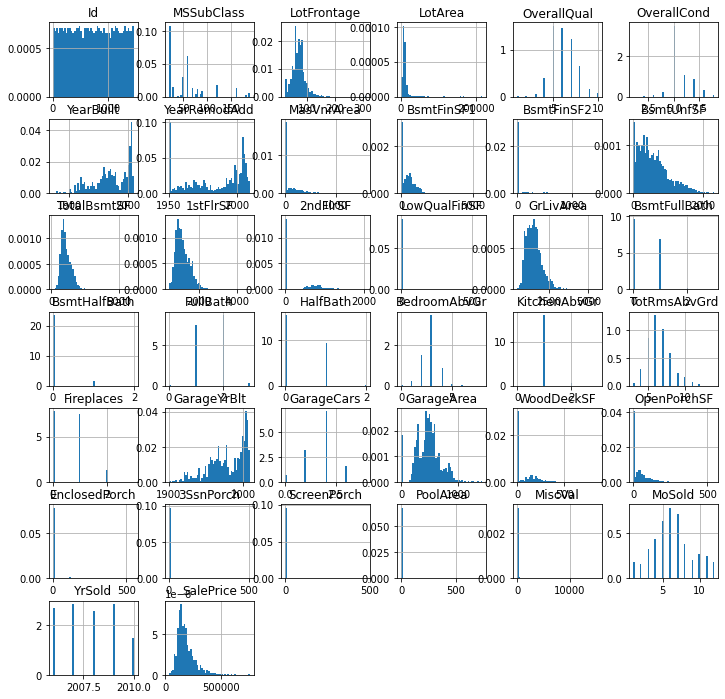

In [50]:
# Plot the histograms for all numerical variables in the complete
# case dataset (as we did in section 3).

data_cca.hist(bins=50, density=True, figsize=(12, 12))

plt.show()

<AxesSubplot:>

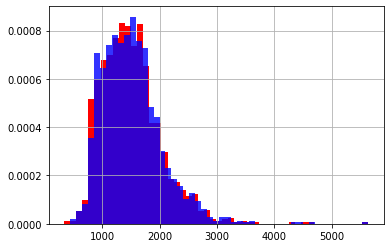

In [51]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# Data after cca:
#the argument "alpha" makes 
# the color  of the plot transparent, so we can
# see the overlay between the 2 distributions.

data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

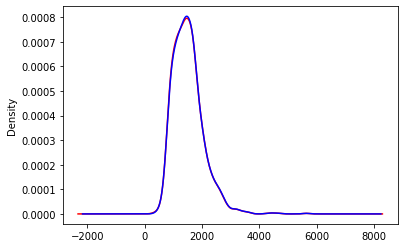

In [53]:
#checking density 
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['GrLivArea'].plot.density(color='red')

# Data after cca.
data_cca['GrLivArea'].plot.density(color='blue')

<AxesSubplot:>

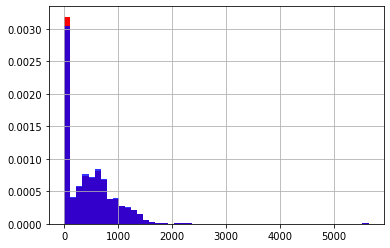

In [54]:
# Let's check the distribution of a few variables before and after 
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['BsmtFinSF1'].hist(bins=50, ax=ax, density=True, color='red')

# Data after cca: the argument "alpha" makes 
# the color  of the plot transparent, so we can
# see the overlay between the 2 distributions.

data_cca['BsmtFinSF1'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

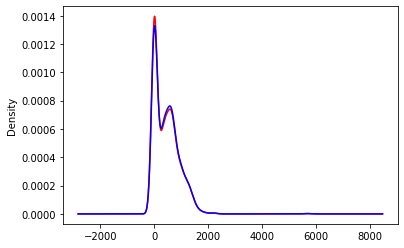

In [55]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Original data.
data['BsmtFinSF1'].plot.density(color='red')

# Data after cca.
data_cca['BsmtFinSF1'].plot.density(color='blue')

In [60]:
# lets check the distribution of categorical data 


def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [57]:

categorical_distribution(data, data_cca, 'BsmtQual')

original       cca
TA  0.444521  0.458924
Gd  0.423288  0.431303
Ex  0.082877  0.084986
Fa  0.023973  0.024788

In [58]:
categorical_distribution(data, data_cca, 'MasVnrType')

original       cca
None     0.591781  0.588527
BrkFace  0.304795  0.310198
Stone    0.087671  0.090652
BrkCmn   0.010274  0.010623

In [59]:
categorical_distribution(data, data_cca, 'SaleCondition')

original       cca
Normal   0.820548  0.820822
Partial  0.085616  0.086402
Abnorml  0.069178  0.070822
Family   0.013699  0.014164
Alloca   0.008219  0.005666
AdjLand  0.002740  0.002125